## NEXUS EDGE DATA CHALLENGE
##### Submitted By: Archan Dutta

### CONTENTS:
* #### IMPORT LIBRARIES
* #### READ CSV FILE INTO PANDAS DATAFRAME
* #### EXPLORATORY DATA ANALYSIS
* #### FEATURE ENGINEERING
* #### MACHINE LEARNING
* #### SAVE MODEL, LOAD MODEL, PREDICT ON DATA
* #### SOME MORE POSSIBLE APPROACHES

I have kept only the most important analysis from the experimentation to make the notebook:
* Readable
* Concise
* Precise

### IMPORT LIBRARIES

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib as mpl

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pickle

### READ CSV FILE INTO PANDAS DATAFRAME

In [2]:
filepath = "M://NexusEdge//master//data.csv"
full_data = pd.read_csv(filepath)

In [3]:
# Checking columns and data types 
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [4]:
# A peek at the data
full_data.head(5)

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2  2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

In [5]:
# Desctiptive Stats for Numerical Variables
full_data.describe()

ID          goal       pledged        backers   usd pledged  \
count  3.786610e+05  3.786610e+05  3.786610e+05  378661.000000  3.748640e+05   
mean   1.074731e+09  4.908079e+04  9.682979e+03     105.617476  7.036729e+03   
std    6.190862e+08  1.183391e+06  9.563601e+04     907.185035  7.863975e+04   
min    5.971000e+03  1.000000e-02  0.000000e+00       0.000000  0.000000e+00   
25%    5.382635e+08  2.000000e+03  3.000000e+01       2.000000  1.698000e+01   
50%    1.075276e+09  5.200000e+03  6.200000e+02      12.000000  3.947200e+02   
75%    1.610149e+09  1.600000e+04  4.076000e+03      56.000000  3.034090e+03   
max    2.147476e+09  1.000000e+08  2.033899e+07  219382.000000  2.033899e+07   

       usd_pledged_real  usd_goal_real  
count      3.786610e+05   3.786610e+05  
mean       9.058924e+03   4.545440e+04  
std        9.097334e+04   1.152950e+06  
min        0.000000e+00   1.000000e-02  
25%        3.100000e+01   2.000000e+03  
50%        6.243300e+02   5.500000e+03  
75%        4.050000e+03   1.550000e+04  
max        2.033899e+07   1.663614e+08

* Some Project has a fundraising goal of 0.01. Weird?
* Some Project has a fundraising goal of 100 million. Interesting?
* Some Project has not been backed by anyone, and therefore probably have pledged amount = 0
* Difference between usd_pledged and usd_pledged_real ? 

In [6]:
# Desctiptive Stats for Categorical Variables
full_data.describe(include=["object"])

name        category main_category currency  \
count                     378657          378661        378661   378661   
unique                    375764             159            15       14   
top     New EP/Music Development  Product Design  Film & Video      USD   
freq                          41           22314         63585   295365   

          deadline             launched   state country  
count       378661               378661  378661  378661  
unique        3164               378089       6      23  
top     2014-08-08  1970-01-01 01:00:00  failed      US  
freq           705                    7  197719  292627

* Most currency is in USD
* Most of the projects are in the US

In [7]:
# Checking Missing values
full_data.apply(lambda x:sum(x.isnull()))

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

* Need to deal with missing values in usd_pledged column

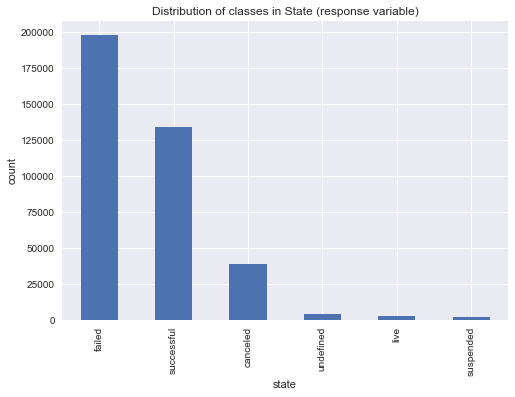

In [8]:
# Distribution of Response Variable
ax = full_data['state'].value_counts().plot(kind = 'bar')
ax.set_title('Distribution of classes in State (response variable)')
ax.set_ylabel('count')
ax.set_xlabel('state')
plt.show()

In [9]:
#Percentage of each class
full_data['state'].value_counts()/full_data['state'].value_counts().sum()*100

failed        52.215306
successful    35.376234
canceled      10.241086
undefined      0.940683
live           0.739184
suspended      0.487507
Name: state, dtype: float64

* It is important to note that there is high imbalance among the class. But according to the challenge, " goal is to predict whether a project will be successful or not.", therefore, I will keep only successful or failed projects

In [10]:
labels_filter = ['failed', 'successful']
full_data = full_data[full_data['state'].isin(labels_filter)]

In [11]:
full_data['state'].value_counts()/full_data['state'].value_counts().sum()*100

failed        59.612271
successful    40.387729
Name: state, dtype: float64

In [12]:
categorical_features = ["category","main_category","currency","state","country"]
for each in categorical_features:
    print('----------------------------Analyzing '+each+' Feature--------------------------')
    print(full_data[each].value_counts())
    print("")

----------------------------Analyzing category Feature--------------------------
Product Design       18680
Documentary          14523
Music                12633
Tabletop Games       11744
Shorts               11394
Food                 10416
Video Games           9328
Film & Video          8624
Fiction               8108
Fashion               7529
Art                   7486
Nonfiction            7414
Theater               6684
Rock                  6246
Children's Books      6198
Apparel               6166
Technology            5726
Indie Rock            5329
Apps                  5287
Photography           5246
Webseries             5148
Publishing            5052
Narrative Film        4618
Comics                4581
Web                   4309
Country & Folk        4213
Crafts                4152
Design                3547
Hip-Hop               3459
Hardware              3115
                     ...  
Blues                  234
Animals                229
Couture                227
F

* The rows are quite similarly distributed across the levels in main_category feature. There is no level that really stands out. 

Based on intuition and indepth analysis, some of the important factors in deciding the state of the project are:
* Backers
* USD Pledged Real (Since USD Pleadged has missing values, let's not consider them. This means we need not delete the rows that have missing values)
* Category
* Main Category
* USD Goal
* Deadline - Launched (Time Period)
* Goal/Time Period
* Launched or Deadline or both (Month,Year)
* Country
* Currency

### Feature Engineering

* Dealing with datetime is very important for this dataset especially because time plays a role in the success or failure of a project.

In [13]:
# Convert String dates to Datetime
full_data['launched_date']=pd.to_datetime(full_data['launched'],format="%Y/%m/%d %H:%M").dt.normalize()
full_data['deadline_date']=pd.to_datetime(full_data['deadline'],format="%Y/%m/%d")

In [14]:
# Obtain WeekDay, Month and Year for Launched Dates
full_data['launched_week_day']=full_data['launched_date'].dt.weekday_name
full_data['launched_month']=full_data['launched_date'].dt.month
full_data['launched_year']=full_data['launched_date'].dt.year

In [15]:
# Obtain WeekDay, Month and Year for Deadline Dates
full_data['deadline_week_day']=full_data['deadline_date'].dt.weekday_name
full_data['deadline_month']=full_data['deadline_date'].dt.month
full_data['deadline_year']=full_data['deadline_date'].dt.year

In [16]:
# Calculate Time Period (new feature)
full_data['time_period'] = full_data['deadline_date'] - full_data['launched_date']

In [17]:
full_data['goal_by_time'] = full_data['usd_goal_real']/full_data['time_period'].dt.days

full_data['time_period'] = pd.to_numeric(full_data['time_period'], downcast = 'float')

### Combine Levels in different categorical variables

----------------------------Analyzing category Feature--------------------------


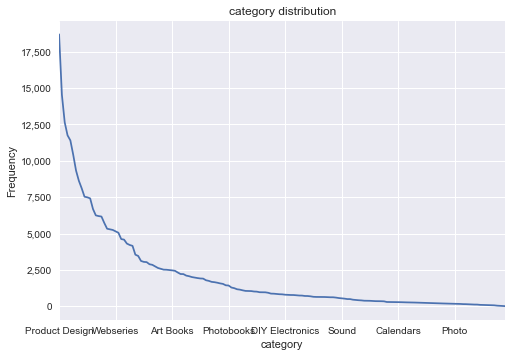


----------------------------Analyzing main_category Feature--------------------------


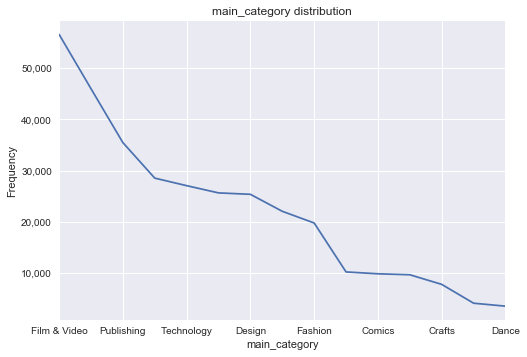


----------------------------Analyzing currency Feature--------------------------


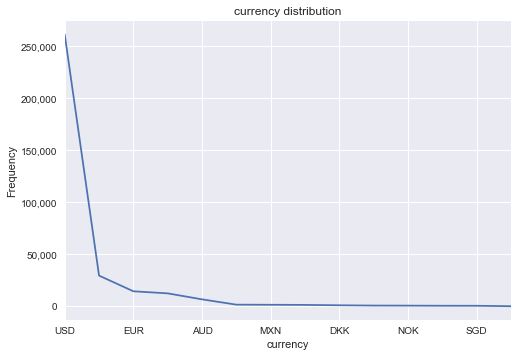


----------------------------Analyzing state Feature--------------------------


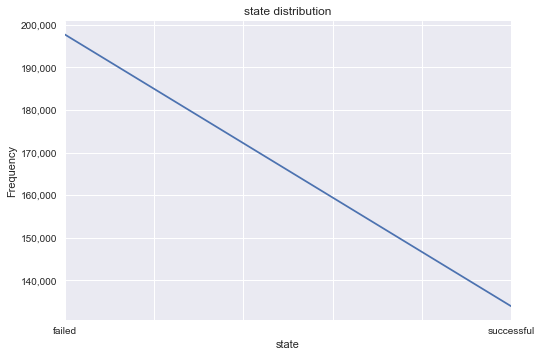


----------------------------Analyzing country Feature--------------------------


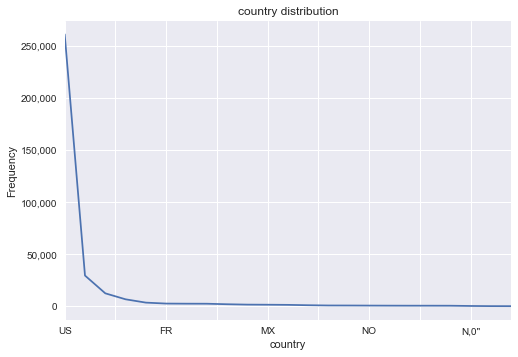

In [18]:
# Visualizing each categorical feature
categorical_features = ["category","main_category","currency","state","country"]
for each in categorical_features:
    print('----------------------------Analyzing '+each+' Feature--------------------------')
    ax = full_data[each].value_counts().plot()
    ax.set_xlabel(each)
    ax.set_ylabel("Frequency")
    ax.legend('')
    ax.set_title(each + ' distribution')
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.show()
    print("")

In [19]:
# Feature : Category
category_counts = full_data['category'].value_counts()

# Tiers for sparser studios
one_K_timers = category_counts[category_counts <= 1000].index
five_K_timers = category_counts[(category_counts > 1000) & (category_counts <= 5000)].index
ten_K_timers = category_counts[(category_counts > 5000) & (category_counts <= 10000)].index
fifteen_K_timers = category_counts[(category_counts > 10000) & (category_counts <= 15000)].index
fifteen_K_above = category_counts[category_counts > 15000].index

# Combine sparse studios
full_data['category'].replace(one_K_timers, 'One K Timer', inplace=True)
full_data['category'].replace(five_K_timers, 'Five K Timer', inplace=True)
full_data['category'].replace(ten_K_timers, 'Ten K Timer', inplace=True)
full_data['category'].replace(fifteen_K_timers, 'Fifteen K Timer', inplace=True)
full_data['category'].replace(fifteen_K_above, 'Fifteen K Above', inplace=True)

In [20]:
full_data['category'].value_counts()

Five K Timer       110479
Ten K Timer        105571
Fifteen K Timer     60710
One K Timer         36235
Fifteen K Above     18680
Name: category, dtype: int64

In [21]:
# Feature : Main Category
main_category_counts = full_data['main_category'].value_counts()
#print(main_category_counts)

# Tiers for sparser studios
ten_K_timers = main_category_counts[main_category_counts <= 10000].index
twenty_K_timers = main_category_counts[(main_category_counts > 10000) & (main_category_counts <= 20000)].index
thirty_K_timers = main_category_counts[(main_category_counts > 20000) & (main_category_counts <= 30000)].index
forty_K_timers = main_category_counts[(main_category_counts > 30000) & (main_category_counts <= 40000)].index
forty_K_above = main_category_counts[(main_category_counts > 40000)].index

# Combine sparse studios
full_data['main_category'].replace(ten_K_timers, 'Ten K Timer', inplace=True)
full_data['main_category'].replace(twenty_K_timers, 'Twenty K Timer', inplace=True)
full_data['main_category'].replace(thirty_K_timers, 'Thirty K Timer', inplace=True)
full_data['main_category'].replace(forty_K_timers, 'Forty K Timer', inplace=True)
full_data['main_category'].replace(forty_K_above, 'Forty K Above', inplace=True)

In [22]:
#full_data.head()
full_data['main_category'].value_counts()

Thirty K Timer    128630
Forty K Above     102476
Forty K Timer      35445
Ten K Timer        35107
Twenty K Timer     30017
Name: main_category, dtype: int64

In [23]:
# Feature : Currency
currency_counts = full_data['currency'].value_counts()

# Tiers for sparser studios
ten_K_timers = currency_counts[currency_counts <= 10000].index
forty_K_timers = currency_counts[(currency_counts > 10000) & (currency_counts <= 40000)].index
forty_K_above = currency_counts[(currency_counts > 30000)].index

# Combine sparse studios
full_data['currency'].replace(ten_K_timers, 'Others', inplace=True)
full_data['currency'].replace(forty_K_timers, 'British Pound, Euro, Canadian Dollar', inplace=True)
full_data['currency'].replace(forty_K_above, 'USD', inplace=True)

In [24]:
full_data['currency'].value_counts()

USD                                     261511
British Pound, Euro, Canadian Dollar     56229
Others                                   13935
Name: currency, dtype: int64

In [25]:
# Feature : Country
country_counts = full_data['country'].value_counts()

# Tiers for sparser studios
five_K_timers = country_counts[country_counts <= 5000].index
ten_K_timers = country_counts[(country_counts > 5000) & (country_counts <= 10000)].index
forty_K_timers = country_counts[(country_counts > 10000) & (country_counts <= 40000)].index
forty_K_above = country_counts[country_counts > 40000].index

# Combine sparse studios
full_data['country'].replace(five_K_timers, 'Five K Timer', inplace=True)
full_data['country'].replace(ten_K_timers, 'Ten K Timer', inplace=True)
full_data['country'].replace(forty_K_timers, 'Britain, Canada', inplace=True)
full_data['country'].replace(forty_K_above, 'USD', inplace=True)

In [26]:
full_data['country'].value_counts()

USD                261360
Britain, Canada     41824
Five K Timer        21875
Ten K Timer          6616
Name: country, dtype: int64

In [27]:
# Data after exploration, transformation and with new features
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331675 entries, 0 to 378660
Data columns (total 25 columns):
ID                   331675 non-null int64
name                 331672 non-null object
category             331675 non-null object
main_category        331675 non-null object
currency             331675 non-null object
deadline             331675 non-null object
goal                 331675 non-null float64
launched             331675 non-null object
pledged              331675 non-null float64
state                331675 non-null object
backers              331675 non-null int64
country              331675 non-null object
usd pledged          331465 non-null float64
usd_pledged_real     331675 non-null float64
usd_goal_real        331675 non-null float64
launched_date        331675 non-null datetime64[ns]
deadline_date        331675 non-null datetime64[ns]
launched_week_day    331675 non-null object
launched_month       331675 non-null int64
launched_year        331675 non-nul

## MACHINE LEARNING

* First, we'll use an **Random Forest classifier**. 
* In general, Random Forests tend to perform better on datasets with imabalanced classes (even though there is **not** much imbalance between successful and failed)
* They work well out-of-the-box
* Can model non-linear relationships, 
* Are quite robust


* Second, we will use AUROC score to evaluate our model performance. We should not use traditional accuracy because of the imbalance.


* I had also tried **logistic regression** but random forest performed much better. There are several other algorithms also that can be experimented with.

### Split Data into Train and Test

In [28]:
labels = full_data['state']
datapoints = full_data.drop('state', axis=1)
X_train, X_test, y_train, y_test = train_test_split(datapoints, labels,stratify=labels,random_state=123)

### Transform data to be fed in the model

In [29]:
train_data = pd.get_dummies (X_train.drop(['ID', 'name','usd pledged' ,'launched_date', 'deadline_date',
                                           'launched_week_day','deadline_week_day','deadline','launched',
                                           'pledged','goal'], axis=1) )

In [30]:
test_data = pd.get_dummies (X_test.drop(['ID', 'name','usd pledged' ,'launched_date', 'deadline_date',
                                         'launched_week_day','deadline_week_day','deadline','launched',
                                         'pledged','goal'], axis=1) )

In [31]:
# Train a basic random forest model
rf = RandomForestClassifier(random_state=1234)
rf.fit(train_data, y_train)

# Make prediction on test set
pred = rf.predict(test_data)

In [32]:
# Confusion matrix can help with indepth analysis of the model
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, pred)
print 'CONFUSION MATRIX:\n', conf_matrix
print '\nTrue Negatives: ', conf_matrix[0,0]
print 'False Negatives: ', conf_matrix[1,0]
print 'True Positives: ', conf_matrix[1,1]
print 'False Positives: ', conf_matrix[0,1]

CONFUSION MATRIX:
[[49139   291]
 [  121 33368]]

True Negatives:  49139
False Negatives:  121
True Positives:  33368
False Positives:  291


In [33]:
class_probabilities = rf.predict_proba(test_data)
class_probabilities = [p[1] for p in class_probabilities]
test_labels = list()
for each in y_test:
    if each == "failed":
        test_labels.append(0)
    else:
        test_labels.append(1)
auc_score = roc_auc_score(test_labels, class_probabilities)
print auc_score

0.999671300755


* The AUC Score is realy very good on the test data. The model is working well!

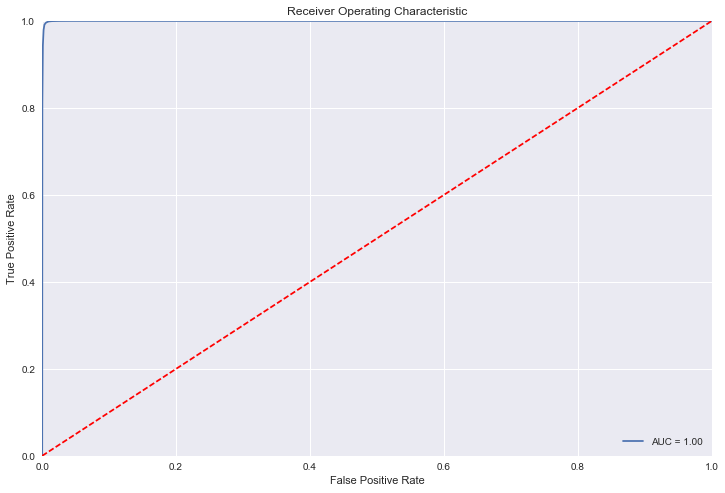

In [34]:
# Let's visualize the ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(test_labels, class_probabilities)

plt.figure(figsize=(12,8))
plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, label = 'AUC = %0.2f' % auc_score)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Save model, Load model and Predict on Data

In [35]:
# Save the model to disk
filename = 'M://NexusEdge/kickstarter_randomforest_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [36]:
def kickstarter_successful_failed(test_data,path):
# Load the model from disk
    loaded_model = pickle.load(open(path, 'rb'))
    predictions = loaded_model.predict(test_data)
    test_data['state'] = predictions
    return test_data

In [37]:
# testing the saved model to see the result
kickstarter_successful_failed(test_data,'M://NexusEdge/kickstarter_randomforest_model.sav')

backers  usd_pledged_real  usd_goal_real  launched_month  \
226217      338          21298.42       18000.00              11   
121825        1              5.00        2000.00               3   
356117       15           1070.01        1000.00              10   
353413       16           2105.00        2000.00               8   
206794      197          32936.00       30000.00               2   
95129        23           1321.00        1250.00              10   
179255        0              0.00      225000.00               4   
360246        9            237.00       10493.00              10   
316962        0              0.00        7866.58               7   
44704        27           2862.00        2750.00               5   
15726        42          46365.00       30000.00               3   
137839       24           3700.00        3200.00              12   
289537       72           2263.90       17184.70               2   
182674      898         585085.11      100000.00               5   
109414       13           2189.00       20000.00               7   
34369         0              0.00         200.00               6   
312083       92          23507.17       20371.27               8   
303076        7            325.00        2500.00               7   
270611       14           1023.86        3693.58               7   
359749       32            831.00        9700.00               6   
255555       19           1206.00       12000.00               1   
258697      361          25332.00        8500.00               8   
369434       21           4050.00       40000.00               2   
65040         1             25.00        2000.00              10   
243515        5            114.65         616.40              10   
123375        2            501.00         500.00              11   
144873        1              2.00        6000.00              12   
334526       23            615.00         500.00               4   
211443      136           8274.00        8000.00               7   
299036        2             53.03        1515.24               7   
...         ...               ...            ...             ...   
3409         58           5804.00        5000.00               7   
326326        1            150.00         900.00               9   
132903        0              0.00       12790.79               2   
74124        61           4668.00        4500.00              10   
249757       31           2840.00        2500.00               9   
167970       22          11098.92       18160.69               5   
355686       15           1610.00       10000.00              11   
291920       26           2172.53        7786.85               5   
349989        5            555.00      150000.00               1   
363241        0              0.00        1000.00               7   
278592        1             15.00         400.00               8   
94160        75           8031.27        8001.00              11   
87548      1229         264675.73       33457.35              11   
349195        4            103.00       50000.00               2   
328936        1             10.00       10000.00               8   
93058         0              0.00       10000.00               9   
116372        1             10.00        1500.00               7   
153606        0              0.00      178274.30              10   
91864       391          25048.78       75000.00               9   
185826       84           5612.99        3250.00               1   
107358        6            241.00      165000.00               5   
282131        5            853.60        5960.90               6   
58549         4            120.00       30000.00              10   
30188         3            126.00        1000.00              11   
152655        4            140.00       25000.00               5   
328112      221          66451.00       65000.00               4   
308530        7           1510.00        1500.00               4

### Some more possible approaches 

* Use Up-sampling for minority class or Down-sampling for majority to reduce imbalance
* Try more models and perform k-fold cross validation
* Perform indepth multvariate analysis